In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load real California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

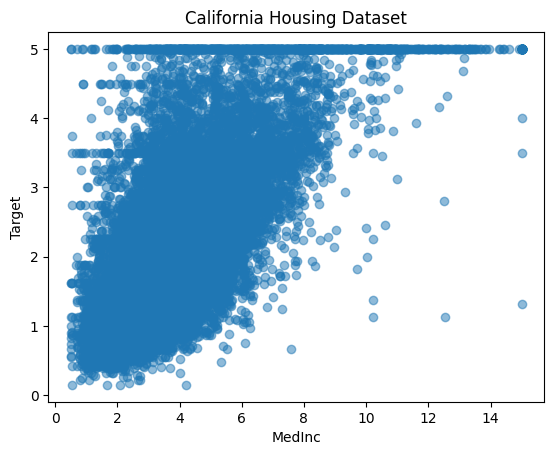

In [3]:
#Visualize the dataset
plt.scatter(X[:, 0], y, alpha=0.5)
plt.xlabel(data.feature_names[0])
plt.ylabel("Target")
plt.title("California Housing Dataset")
plt.show()

In [4]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Train Decision Tree (complex model → may overfit)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
# Predictions
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)

In [8]:
# Errors
lin_train_error = mean_squared_error(y_train, y_train_pred_lin)
lin_test_error = mean_squared_error(y_test, y_test_pred_lin)

tree_train_error = mean_squared_error(y_train, y_train_pred_tree)
tree_test_error = mean_squared_error(y_test, y_test_pred_tree)

In [9]:
# Print results
print("Linear Regression - Train MSE:", lin_train_error, "Test MSE:", lin_test_error)
print("Decision Tree     - Train MSE:", tree_train_error, "Test MSE:", tree_test_error)

Linear Regression - Train MSE: 0.5233576288267754 Test MSE: 0.5305677824766757
Decision Tree     - Train MSE: 9.904697258622977e-32 Test MSE: 0.5280096503174904


In [10]:
# Bar chart to compare errors
plt.figure(figsize=(8,5))
models = ["Linear Regression", "Decision Tree"]
train_errors = [lin_train_error, tree_train_error]
test_errors = [lin_test_error, tree_test_error]

<Figure size 800x500 with 0 Axes>

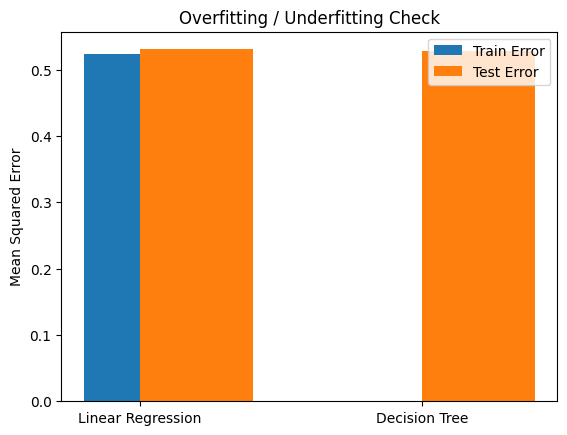

In [15]:
x = range(len(models))
plt.bar(x, train_errors, width=0.4, label="Train Error", align="center")
plt.bar(x, test_errors, width=0.4, label="Test Error", align="edge")
plt.xticks(x, models)
plt.ylabel("Mean Squared Error")
plt.title("Overfitting / Underfitting Check")
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_lin_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Add squared terms
    ('lin', LinearRegression())
])
poly_lin_reg.fit(X_train, y_train)

y_train_pred_poly = poly_lin_reg.predict(X_train)
y_test_pred_poly = poly_lin_reg.predict(X_test)

print("Poly Linear Regression - Train MSE:",
      mean_squared_error(y_train, y_train_pred_poly),
      "Test MSE:",
      mean_squared_error(y_test, y_test_pred_poly))

Poly Linear Regression - Train MSE: 0.423600947157196 Test MSE: 0.4549723395755791


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

print("Random Forest - Train MSE:",
      mean_squared_error(y_train, rf_reg.predict(X_train)),
      "Test MSE:",
      mean_squared_error(y_test, rf_reg.predict(X_test)))

Random Forest - Train MSE: 0.1694470744090007 Test MSE: 0.29449903404773414
